## Линейный регрессионный анализ. Интерпретация результатов

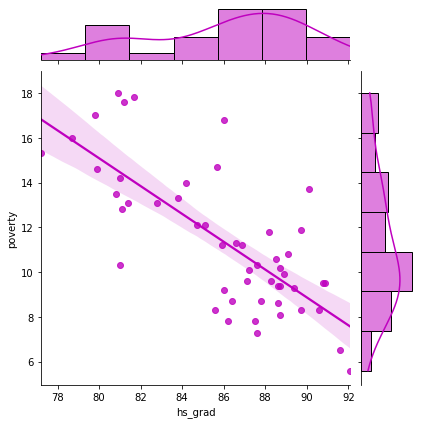

In [1]:
import pandas as pd
import seaborn as sns

states_data = pd.read_csv('./data/states.csv')

sns.jointplot(x='hs_grad', y='poverty', data=states_data, kind='reg', color='m')

In [2]:
import statsmodels.formula.api as sm

model = sm.ols(formula='poverty ~ hs_grad', data=states_data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           3.11e-10
Time:                        12:36:12   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      9.523      0.0

* const – это свободный член (b0), в других моделях может выглядеть как Intercept  
* Ниже располагается НП (b1)  
* Значения, связанные с b0, интерпретировать не нужно, нас интересует именно угол наклона  
* coef – значение коэффициента, отрицательные значения означают отрицательную взаимосвязь, положительные - положительную  
* std err – стандартная ошибка  
* t – t-критерий  
* P > |t| – p-значение  
* Последним идёт 95%-ый доверительный интервал 

В левой верхней части таблицы указаны некоторые формальные характеристики модели (название ЗП, метод, тип ковариации, время создания объекта и т.д.)  
В правой верхней части таблицы находятся показатели качества модели (в первую очередь нам интересны $R^{2}$ и его скорректированная разновидность)  
В нижней части таблицы указаны диагностические характеристики модели.  
В частности, Omnibus и Jarque-Bera - это два разных теста нормальности остатков (prob - их p-значение),  
skew - коэффициент асимметрии,  
kurtosis - коэффициент эксцесса (насколько вытянутое или плоское распределение остатков),  
Durbin-Watson - тест автокорреляции остатков (должен быть между 0 и 4),  
Cond. No. - показатель мультиколлинеарности (должен быть меньше 2)

Также важно знать про коэффициент детерминации $R^{2}$ - это квадрат коэффициента корреляции Пирсона и он отображает,  
в какой степени дисперсия одной переменной обусловлена влиянием другой переменной.  
Он принимает значения от 0 до 1, и с его помощью можно оценивать качество одномерной регрессионной модели – чем больше $R^{2}$, тем лучше.

### Работа модели на предсказания

In [3]:
print(result.predict(pd.DataFrame({'hs_grad': [62]})))

0    26.265529
dtype: float64
